In [1]:
# install reverse_geocoder
!pip install reverse_geocoder

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import os
import matplotlib.dates as mdates
import datetime

# Data 200 - Graduate Project

Gavin Chan, Andrew Gorin, Xinchen Lu

**Research Question**: Our group intends to use Topic 2: Dataset A in order to explore the relationship between a variety of weather phenomena, likely heat and precipitation anomaly, and human behavior (e.g. crime, suicide, etc). This idea was partially inspired by Solomon Hsiang and Marshall Burke’s work on such subjects (Science, 2013; Nature Climate Change, 2018). In addition to the provided datasets, we’re considering including FBI crime data on arrests.

### Setup and Preprocessing

Run this on first time setup. It will create a dataset folder, download the necessary datasets, and unzip them. 

**Note**: this make take some time to run.

In [2]:
# Run this on first time setup. It will create a dataset folder,
# download the necesarry datasets, and unzip them.

# note, this may take some time to run.
download_unzip_datasets = False

if download_unzip_datasets:
    # source from:
    # https://stackoverflow.com/questions/19602931/basic-http-file-downloading-and-saving-to-disk-in-python
    import os
    import urllib.request 
    !pip install gdown
    import pathlib
    import zipfile
    import gdown
    import shutil
    
    dataset_path = "./datasets/"
    
    # create folder if doesn't exist
    # https://stackoverflow.com/questions/273192/how-can-i-safely-create-a-nested-directory
    pathlib.Path('./datasets').mkdir(parents=True, exist_ok=True) 
    print('Created datsets folder')
    
    # get NIBRS 2020 data
    # https://stackoverflow.com/questions/20338452/saving-files-downloaded-from-urlretrieve-to-another-folder-other
    url = "https://s3-us-gov-west-1.amazonaws.com/cg-d4b776d0-d898-4153-90c8-8336f86bdfec/masters/nibrs/nibrs-2020.zip"
    file_name = os.path.join(dataset_path, "nibrs-2019.zip")
    response = urllib.request.urlretrieve(url, file_name)
    print('Downloaded NIBRS 2020')
    
    # unzip file
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall(dataset_path)
    print('Extracted NIBRS 2020')
    
    
    # get NIBRS 2019 data
    # https://stackoverflow.com/questions/20338452/saving-files-downloaded-from-urlretrieve-to-another-folder-other
    url = "https://s3-us-gov-west-1.amazonaws.com/cg-d4b776d0-d898-4153-90c8-8336f86bdfec/masters/nibrs/nibrs-2019.zip"
    file_name = os.path.join(dataset_path, "nibrs-2020.zip")
    response = urllib.request.urlretrieve(url, file_name)
    print('Downloaded NIBRS 2019')
    
       # unzip file
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall(dataset_path)
    print('Extracted NIBRS 2019')
    
    
    # get NIBRS 2019 data
    # https://stackoverflow.com/questions/20338452/saving-files-downloaded-from-urlretrieve-to-another-folder-other
    url = "https://s3-us-gov-west-1.amazonaws.com/cg-d4b776d0-d898-4153-90c8-8336f86bdfec/masters/nibrs/nibrs-2018.zip"
    file_name = os.path.join(dataset_path, "nibrs-2018.zip")
    response = urllib.request.urlretrieve(url, file_name)
    print('Downloaded NIBRS 2018')
    
    # unzip file
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall(dataset_path)
    print('Extracted NIBRS 2018')

    # get weather dataset from google drive
    # https://github.com/wkentaro/gdown
    url = "https://drive.google.com/uc?id=15pjzsCiIE0uL69a4tZYgXoog8TKjIJNJ"
    output = "./datasets/daily_global_weather_2020.csv"
    gdown.download(url, output, quiet=False)
    print('Downloaded Weather 2020 Data')

In [3]:
FBI_CRIME_2020_PATH = './datasets/2020_NIBRS_NATIONAL_MASTER_FILE_ENC.txt'
FBI_CRIME_2019_PATH = './datasets/2019_NIBRS_NATIONAL_MASTER_FILE_ENC_STATIC.txt'
FBI_CRIME_2018_PATH = './datasets/2018_NIBRS_NATIONAL_MASTER_FILE_ENC.txt'
WEATHER_2020_PATH = './daily_global_weather/daily_global_weather_2020.csv'

In [4]:
# read daily 2020 weather dataset
df_daily_global_weather = pd.read_csv(WEATHER_2020_PATH)

# df_daily_global_weather.describe()
df_daily_global_weather.head(5)

,Unnamed: 0,Station,Date,TAVG,PRCP,Latitude,Longitude,Elevation
0,0,AE000041196,2020-01-01,211.0,0.0,25.333,55.5170,34.0
1,1,AEM00041194,2020-01-01,217.0,0.0,25.255,55.3640,10.4
2,2,AFM00040938,2020-01-01,54.0,23.0,34.210,62.2280,977.2
3,3,AG000060611,2020-01-01,71.0,10.0,28.050,9.6331,561.0
4,4,AGE00147708,2020-01-01,99.0,0.0,36.720,4.0500,222.0


In [5]:
# get the latitudes and longitudes from the dataframe, create each lat/long
# pair, and use reverse geocoder to get each location

latitudes = df_daily_global_weather['Latitude']
longitudes = df_daily_global_weather['Longitude']
pairs_locations = list(zip(latitudes, longitudes))
results = rg.search(pairs_locations)

Loading formatted geocoded file...


In [6]:
# create a dataframe with the results from the reverse geocoder search
df_locations = pd.DataFrame.from_dict(results)
print(df_locations.shape)

(1362814, 6)


In [7]:
# merge the geocoded locations with the weather dataset
df_daily_global_weather_location = (
    df_daily_global_weather.merge(right=df_locations,
    how="inner",
    left_index=True,
    right_index=True
    ))

In [8]:
# EDA: get the weather in California
df_daily_CA_weather = df_daily_global_weather_location[(df_daily_global_weather_location['cc'] == 'US') & (df_daily_global_weather_location['admin1'] == 'California')]
df_daily_CA_weather

,Unnamed: 0,Station,Date,TAVG,PRCP,Latitude,Longitude,Elevation,lat,lon,name,admin1,admin2,cc
3196,3196,USS0019L03S,2020-01-01,5.0,0.0,38.8500,-119.9400,2370.1,38.93324,-119.98435,South Lake Tahoe,California,El Dorado County,US
3197,3197,USS0019L05S,2020-01-01,13.0,0.0,38.6100,-119.9200,2455.8,38.93324,-119.98435,South Lake Tahoe,California,El Dorado County,US
3199,3199,USS0019L07S,2020-01-01,23.0,0.0,38.3100,-119.6000,2690.5,38.25575,-119.23127,Bridgeport,California,Mono County,US
3200,3200,USS0019L08S,2020-01-01,30.0,0.0,38.3000,-119.5500,2194.0,38.25575,-119.23127,Bridgeport,California,Mono County,US
3201,3201,USS0019L13S,2020-01-01,32.0,0.0,38.0700,-119.2300,2878.8,38.25575,-119.23127,Bridgeport,California,Mono County,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362696,1362696,USW00023273,2020-12-31,97.0,3.0,34.8994,-120.4486,73.8,34.86526,-120.436,Orcutt,California,Santa Barbara County,US
1362724,1362724,USW00024216,2020-12-31,77.0,0.0,40.1519,-122.2536,107.6,40.17849,-122.23583,Red Bluff,California,Tehama County,US
1362733,1362733,USW00024257,2020-12-31,76.0,0.0,40.5175,-122.2986,151.5,40.44821,-122.29778,Anderson,California,Shasta County,US
1362756,1362756,USW00093193,2020-12-31,85.0,0.0,36.7800,-119.7194,101.5,36.79301,-119.70097,Tarpey Village,California,Fresno County,US


## Data Sampling and Collection

#### 1. How were the data collected?

Data from the Topic 2: Dataset A (Climate and the Environment - General Measurements and Statistics) is organized by the National Oceanic and Atmospheric Administration (NOAA) and includes daily land surface observations from stations across the world. From their [website](https://www.ncei.noaa.gov/cdo-web/datasets) and [documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf), the data is collected as observations from the "World Meteorological Organization, Cooperative, and CoCoRaHS networks." Data, such as the temperature daily maximum/minimum which we are concerned with, are collected across more than 100,000 stations across the world.



#### 2. Was there any potential bias introduced in the sampling process?

For the weather dataset, there is a small chance of bias introduced due to the extensive [Data Integration and Quality Control](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily#tab-298) measures put into place by NOAA. Problems such as temperature consistency, data duplication, unverified stations, and more and hanlded by NOAA's methods before the data is uploaded into the dataset.

Bias could be introduced into the NIBRS Crime Dataset. According to the [FBI's website](https://www.fbi.gov/how-we-can-help-you/need-an-fbi-service-or-more-information/ucr/nibrs), transition to NIBRS from a previous system is still ongoing. NIBRS appears to collect more information that the previous system, therefore, the data could be biased with more information towards recent years. Therefore, data reporting could be bias towards (1) more recent years and (2) towards stations that have fully implemented NIBRS. However, data consistency is still prevalent as it is likely all crimes that are recorded are reported. Additionally, NIBRS includes [Dataset Quality Assurance measures](https://le.fbi.gov/file-repository/ucr-quality-assurance-review-methodology.pdf/view) to prevent invalid reporting of crime.

## Data Sampling and Collection

#### 1. What type of data are you currently exploring?
#### 2. What is the granularity of the data?
#### 3. What does the distribution of the data look like? Are there any outliers? Are there any missing or invalid entries?

## EDA For Weather Dataset

First, we can load in all of the daily average weather data from 2010 to 2021. We store this data in `df_weather_years`. For the granularity of the data, each row holds the weather recorded by a data station on a particular day. That is, each row has the average temperature and and precipitation recorded by a weather station (with latitude, longitude) on a particular day of the year. We then append the reverse-geocoded location, which adds a city, state, county, and country to each row.

In [9]:
def load_US_weather():
    '''
    This function will read each file under ./daily_global_weather,
    extract the data corresponding to United States locations, 
    append to a dataframe, and return that dataframe
    '''
    files = os.listdir('./daily_global_weather/')
    df = None
    
    for name in files:
        path = './daily_global_weather/{}'.format(name)
        
        curr_df = pd.read_csv(path)
        curr_df = curr_df.drop(columns='Unnamed: 0')
        
        # get the latitudes and longitudes from the dataframe, create each lat/long
        # pair, and use reverse geocoder to get each location
        latitudes = curr_df['Latitude']
        longitudes = curr_df['Longitude']
        pairs_locations = list(zip(latitudes, longitudes))
        results = rg.search(pairs_locations)
        
        # create a dataframe with the results from the reverse geocoder search
        df_locations = pd.DataFrame.from_dict(results)
        
        # merge the geocoded locations with the weather dataset
        curr_df = (
            curr_df.merge(right=df_locations,
            how="inner",
            left_index=True,
            right_index=True
            ))
        
        # only keep entries in the US
        curr_df = curr_df[curr_df['cc']=='US']
        
        if df is not None:
            df = pd.concat([df, curr_df])
        else:
            df = curr_df
            
        df = df.reset_index(drop=True)
    
    # https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt
    # TVG is in tenths of degrees C, convert to Fahrenheit
    df['TAVG Fahrenheit'] = ((df['TAVG'] / 10) * (9./5)) + 32.
    
    # drop duplicate latitude and logitude
    df = df.drop(columns=['lat', 'lon'])
    
    # convert column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    return df

# df_weather_years hold all of the US weather from 2010 to 2021
df_weather_years = load_US_weather()

# rename name, admin1, and admin2 to city, state, and county
replace_loc_dic = {'name': 'city', 'admin1': 'state', 'admin2': 'county'}
df_weather_years = df_weather_years.rename(columns=replace_loc_dic)

We then can group by the date and the state (which will be useful later, as the resolution of the FBI crime data is by state) and average over the values. Average Longitude, latitude, and elevation may be useful during the Data Modeling portion of our project, so we include these values.

In [10]:
df_states_weather_years = (
    df_weather_years
    .groupby(['Date', 'state'])[['TAVG', 'PRCP', 'TAVG Fahrenheit', 'Latitude', 'Longitude', 'Elevation']]
    .mean()
    .reset_index()
)

df_states_weather_years

,Date,state,TAVG,PRCP,TAVG Fahrenheit,Latitude,Longitude,Elevation
0,2010-01-01,Alaska,-182.571429,1.020408,-0.862857,63.023061,-148.255918,492.018367
1,2010-01-01,Arizona,0.850000,3.750000,32.153000,34.536000,-110.615500,2457.385000
2,2010-01-01,California,8.730769,22.423077,33.571538,39.295000,-120.072692,2296.826923
3,2010-01-01,Colorado,-51.018692,17.448598,22.816636,39.095794,-106.624393,3071.671963
4,2010-01-01,Georgia,64.000000,43.000000,43.520000,32.350000,-85.000000,88.100000
...,...,...,...,...,...,...,...,...
175980,2021-12-31,Virginia,118.428571,9.571429,53.317143,37.825100,-77.522043,115.242857
175981,2021-12-31,Washington,-85.931034,0.724138,16.532414,47.372000,-120.901045,938.079310
175982,2021-12-31,West Virginia,90.250000,6.500000,48.245000,38.353325,-81.280225,474.525000
175983,2021-12-31,Wisconsin,-9.000000,3.250000,30.380000,43.618200,-89.153400,218.700000


As an example, we can plot the average temperature of a particular state (such as Texas). The plot is periodic, which corresponds to the seasonal changes in weather over a year.

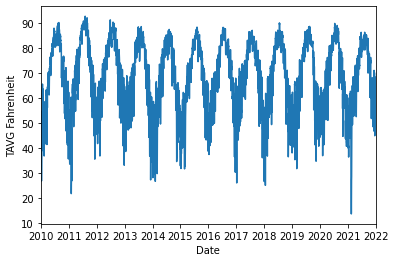

In [11]:
ax = sns.lineplot(data=df_states_weather_years\
                  [df_states_weather_years['state']=='Texas'],
                  x='Date',
                  y='TAVG Fahrenheit')

# https://matplotlib.org/2.0.2/examples/api/date_demo.html
datemin = datetime.date(df_states_weather_years['Date'].min().year, 1, 1)
datemax = datetime.date(df_states_weather_years['Date'].max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)

years = mdates.YearLocator()    # every year
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
plt.show()

We notice that some states (such as Iowa, Louisiana, Iowa, Michigan, and others) do not have data before 2013. However, this is acceptable, as we will be averaging over each day of the year in a later portion of the project. A limitation of this could be a misrepresented average, however, given more time for the project, we could collect weather data from more years (such as before 2010) to account for this missing data.

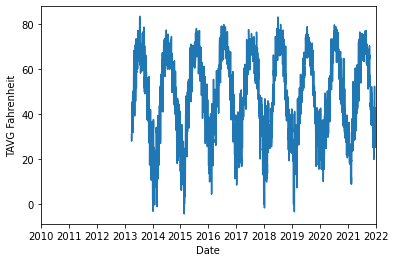

In [12]:
ax = sns.lineplot(data=df_states_weather_years\
                  [df_states_weather_years['state']=='Michigan'],
                  x='Date',
                  y='TAVG Fahrenheit')

# https://matplotlib.org/2.0.2/examples/api/date_demo.html
datemin = datetime.date(df_states_weather_years['Date'].min().year, 1, 1)
datemax = datetime.date(df_states_weather_years['Date'].max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)

years = mdates.YearLocator()    # every year
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
plt.show()

We can extract the day of the year from each date, which will be helpful in the Data Modeling portion of the project.

In [13]:
def extract_day_of_year(df):
    '''
    adds Day of Year as a column to dataframe
    '''
    df['Day of Year'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.day_of_year
    
    return df

df_states_weather_years = extract_day_of_year(df_states_weather_years)
df_states_weather_years

,Date,state,TAVG,PRCP,TAVG Fahrenheit,Latitude,Longitude,Elevation,Day of Year
0,2010-01-01,Alaska,-182.571429,1.020408,-0.862857,63.023061,-148.255918,492.018367,1
1,2010-01-01,Arizona,0.850000,3.750000,32.153000,34.536000,-110.615500,2457.385000,1
2,2010-01-01,California,8.730769,22.423077,33.571538,39.295000,-120.072692,2296.826923,1
3,2010-01-01,Colorado,-51.018692,17.448598,22.816636,39.095794,-106.624393,3071.671963,1
4,2010-01-01,Georgia,64.000000,43.000000,43.520000,32.350000,-85.000000,88.100000,1
...,...,...,...,...,...,...,...,...,...
175980,2021-12-31,Virginia,118.428571,9.571429,53.317143,37.825100,-77.522043,115.242857,365
175981,2021-12-31,Washington,-85.931034,0.724138,16.532414,47.372000,-120.901045,938.079310,365
175982,2021-12-31,West Virginia,90.250000,6.500000,48.245000,38.353325,-81.280225,474.525000,365
175983,2021-12-31,Wisconsin,-9.000000,3.250000,30.380000,43.618200,-89.153400,218.700000,365


The end goal is to calculate a metric 'away from the average' that is useful for data modeling. Therefore, we can calculate the Z-score (or standardized data with mean 0 and standard deviation of 1) of an input temperature with regards to its average on a particular day, which will return a value of "how many standard deviations away" is the input temperature. Let's look at a particular state, for example, Texas. 

We first calculate the average temperature and stand deviation for each day of the year.

<AxesSubplot:xlabel='Day of Year', ylabel='Yearly TAVG Fahrenheit'>

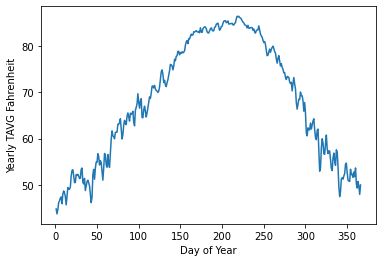

In [14]:
# get Texas weather and graph average over 2010-2021 years
df_weather_texas_raw = df_states_weather_years[df_states_weather_years['state']=='Texas']
df_weather_texas_average = (
    df_weather_texas_raw
    .groupby('Day of Year')[['TAVG Fahrenheit']]
    .mean()
    .rename(columns={'TAVG Fahrenheit': 'Yearly TAVG Fahrenheit'})
)

df_weather_texas_std = (
    df_weather_texas_raw
    .groupby('Day of Year')[['TAVG Fahrenheit']]
    .std()
    .rename(columns={'TAVG Fahrenheit': 'Yearly STD Fahrenheit'})
)

sns.lineplot(data=df_weather_texas_average, x='Day of Year', y='Yearly TAVG Fahrenheit')

In [15]:
# df_weather_texas_average.rolling(30).mean().shift(0)

We can then merge the standard deviation and average into the dataframe, such that we can calculate Z-score.

In [16]:
# We then merge the average temperature and standard deviation into the df_weather_texas
# such that we can calculate a z-score for each temperature for plotting crime
df_weather_texas = (
    df_weather_texas_raw
    .merge(right=df_weather_texas_average, how='inner', on='Day of Year')
    .merge(right=df_weather_texas_std, how='inner', on='Day of Year')
)

# we can confirm that each average and standard deviation is added to the corresponding
# row by querying a particular day of the year
df_weather_texas[df_weather_texas['Day of Year']==9]

,Date,state,TAVG,PRCP,TAVG Fahrenheit,Latitude,Longitude,Elevation,Day of Year,Yearly TAVG Fahrenheit,Yearly STD Fahrenheit
96,2010-01-09,Texas,-3.000000,0.000000,31.460000,29.273300,-94.859200,1.500000,9,48.008505,8.64839
97,2011-01-09,Texas,82.500000,161.500000,46.850000,31.045000,-96.104600,108.200000,9,48.008505,8.64839
98,2012-01-09,Texas,132.000000,351.500000,55.760000,31.045000,-96.104600,108.200000,9,48.008505,8.64839
99,2013-01-09,Texas,135.000000,511.500000,56.300000,31.045000,-96.104600,108.200000,9,48.008505,8.64839
100,2014-01-09,Texas,92.083333,25.750000,48.575000,31.463979,-98.360917,365.225000,9,48.008505,8.64839
101,2015-01-09,Texas,22.250000,10.375000,36.005000,31.463979,-98.360917,365.225000,9,48.008505,8.64839
102,2016-01-09,Texas,80.833333,7.750000,46.550000,31.463979,-98.360917,365.225000,9,48.008505,8.64839
103,2017-01-09,Texas,102.541667,0.000000,50.457500,31.463979,-98.360917,365.225000,9,48.008505,8.64839
104,2018-01-09,Texas,102.434783,0.000000,50.438261,31.368752,-98.210800,337.917391,9,48.008505,8.64839
105,2019-01-09,Texas,111.625000,0.208333,52.092500,31.463979,-98.360917,365.225000,9,48.008505,8.64839


Finally, we calculate the Z-score for each day-of-the-year's temperature from the calculated average for Texas.

In [17]:
df_weather_texas['Z-Score'] = \
    (df_weather_texas['TAVG Fahrenheit']\
    - df_weather_texas['Yearly TAVG Fahrenheit'])\
    / df_weather_texas['Yearly STD Fahrenheit']

df_weather_texas['Temp Ratio'] = \
    df_weather_texas['TAVG Fahrenheit']\
    / df_weather_texas['Yearly TAVG Fahrenheit']

df_weather_texas

,Date,state,TAVG,PRCP,TAVG Fahrenheit,Latitude,Longitude,Elevation,Day of Year,Yearly TAVG Fahrenheit,Yearly STD Fahrenheit,Z-Score,Temp Ratio
0,2010-01-01,Texas,60.500000,4.000000,42.890000,31.045000,-96.104600,108.200000,1,44.783723,8.822802,-0.214640,0.957714
1,2011-01-01,Texas,92.500000,0.000000,48.650000,31.045000,-96.104600,108.200000,1,44.783723,8.822802,0.438214,1.086332
2,2012-01-01,Texas,142.000000,5.000000,57.560000,31.045000,-96.104600,108.200000,1,44.783723,8.822802,1.448097,1.285288
3,2013-01-01,Texas,104.000000,522.000000,50.720000,31.045000,-96.104600,108.200000,1,44.783723,8.822802,0.672834,1.132554
4,2014-01-01,Texas,85.833333,2.708333,47.450000,31.463979,-98.360917,365.225000,1,44.783723,8.822802,0.302203,1.059537
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,2020-06-19,Texas,283.086957,112.782609,82.955652,31.368752,-98.210800,337.917391,171,83.056887,2.111766,-0.047939,0.998781
4377,2021-06-20,Texas,294.333333,8.166667,84.980000,31.463979,-98.360917,365.225000,171,83.056887,2.111766,0.910666,1.023154
4378,2012-12-31,Texas,104.000000,4.000000,50.720000,31.045000,-96.104600,108.200000,366,49.979130,4.933206,0.150180,1.014824
4379,2016-12-31,Texas,125.000000,63.958333,54.500000,31.463979,-98.360917,365.225000,366,49.979130,4.933206,0.916416,1.090455


In [18]:
### OLD, will likely delete
# EDA: for a particular Station, graph its daily weather over the entire year in
# a line graph

# df_station = df_daily_CA_weather.loc[df_daily_CA_weather['Station'] == 'USS0019L03S']
# df_station

In [19]:
### OLD, will likely delete
# sns.lineplot(data=df_station, x='Date', y='TAVG')
# plt.title('Temperature in 2020 for USS0019L03S at South Lake Tahoe, CA');
# #TODO: overplotting of dates. Need to fix (ex. first day of every month)

In [20]:
### OLD, will likely delete
# sns.lineplot(x=df_station['Date'], y=df_station['PRCP'].cumsum())
#TODO: overplotting of dates. Need to fix (ex. first day of every month)
# plt.title('Cumulative Rainfall in 2020 for USS0019L03S at South Lake Tahoe, CA');

## EDA For Crime Dataset

In [21]:
# read through each line of the FBI data and extract the line
# if it is an offence (code 02)
df_crime_data_2020 = pd.DataFrame()
input_string_arr = []
with open(FBI_CRIME_2020_PATH) as file:
    count = 0
    for line in file:
        if line[0:2] == '02':
            input_string_arr.append(line)
            count += 1
df_crime_data_2020['input_string'] = input_string_arr
            
print("Read in 2020")
df_crime_data_2019 = pd.DataFrame()
input_string_arr = []           
with open(FBI_CRIME_2019_PATH) as file:
    count = 0
    for line in file:
        if line[0:2] == '02':
            input_string_arr.append(line)
            count += 1
df_crime_data_2019['input_string'] = input_string_arr
            
            
print("Read in 2019")
df_crime_data_2018 = pd.DataFrame()
input_string_arr = []           
with open(FBI_CRIME_2018_PATH) as file:
    count = 0
    for line in file:
        if line[0:2] == '02':
            input_string_arr.append(line)
            count += 1

print("Read in 2018")

df_crime_data_2018['input_string'] = input_string_arr

display(df_crime_data_2020.head(5))

Read in 2020
Read in 2019
Read in 2018


,input_string
0,0201AL0010700 0E055CN33EM20200312250CN 24 P...
1,0201AL0010700 1FRBJSK-TT520200225220CN 20 F ...
2,0201AL0010700 286 AUA59PJ20200320220CN 20 N ...
3,0201AL0010700 90ALHXO1G1A2020041713ACN 20 ...
4,0201AL0010700 IDBE72OFU1920200218220CN 20 F ...


In [22]:
def decode_raw_string(df):
    '''
    Split into appropriate columns
    Input: dataframe with raw string
    '''
    # segment level
    df['Segment Level'] = df['input_string'].str[0:2].astype(int)

    # state code 
    df['State Code'] = df['input_string'].str[2:4].astype(int)

    # originating agency identifier
    df['Originating Agency Identifier (ORI)'] = df['input_string'].str[4:13]

    # incident number
    df['Incident Number'] = df['input_string'].str[13:25]

    # incident date
    df['Incident Date'] = df['input_string'].str[25:33]

    # UCR offence code
    df['UCR Offense Code'] = df['input_string'].str[33:36]

    # offense attempted / completed
    df['Offense Attempted/Completed'] = df['input_string'].str[36]

    # offender suspected of using
    df['Suspected of Using 1'] = df['input_string'].str[37]
    df['Suspected of Using 2'] = df['input_string'].str[38]
    df['Suspected of Using 3'] = df['input_string'].str[39]

    # location type
    df['Location Type'] = df['input_string'].str[40:42]

    # number of premises entered
    df['Number of Premises Entered'] = df['input_string'].str[42:44]

    # method of entry
    df['Method of Entry - Force'] = df['input_string'].str[44]

    # type criminal activity
    df['Type Criminal Activity 1'] = df['input_string'].str[45]
    df['Type Criminal Activity 2'] = df['input_string'].str[46]
    df['Type Criminal Activity 3'] = df['input_string'].str[47]

    # type weapon/force involved, and automatic indicator
    df['Type Weapon/Force Involved 1'] = df['input_string'].str[48:50]
    df['Weapon 1 Automatic Indicator'] = df['input_string'].str[50]
    df['Type Weapon/Force Involved 2'] = df['input_string'].str[51:53]
    df['Weapon 2 Automatic Indicator'] = df['input_string'].str[53]
    df['Type Weapon/Force Involved 3'] = df['input_string'].str[54:56]
    df['Weapon 3 Automatic Indicator'] = df['input_string'].str[56]
    
    # bias motivation
    df['Bias Motivation'] = df['input_string'].str[57:59].astype(int)
    
    print('Finished getting substrings and converting to columns')
    
    replace_dict = {
        'UCR Offense Code' : {'200': 'Arson',
                              '13A': 'Aggravated Assault',
                              '13B': 'Simple Assault',
                              '13C': 'Intimidation',
                              '510': 'Bribery',
                              '220': 'Burglary/Breaking and Entering',
                              '250': 'Counterfeiting/Forgery',
                              '290': 'Destruction/Damage/Vandalism of Property',
                              '35A': 'Drug/Narcotic Violations',
                              '35B': 'Drug Equipment Violations',
                              '270': 'Embezzlement',
                              '210': 'Extortion/Blackmail',
                              '26A': 'False Pretenses/Swindle/Confidence Game',
                              '26B': 'Credit Card/Automatic Teller Machine Fraud',
                              '26C': 'Impersonation',
                              '26D': 'Wellfare Fraud',
                              '26E': 'Wire Fraud',
                              '39A': 'Betting/Wagering',
                              '39B': 'Operating/Promoting/Assisting Gambling',
                              '39C': 'Gambling Equipment Violations',
                              '39D': 'Sports Tampering',
                              '09A': 'Murder/Nonnegligent Manslaughter',
                              '09B': 'Negligent Manslaughter',
                              '09C': 'Justifiable Homocide',
                              '100': 'Kidnaping/Abduction',
                              '23A': 'Pocket-Picking',
                              '23B': 'Purse-snatching',
                              '23C': 'Shoplifting',
                              '23D': 'Theft From Building',
                              '23E': 'Theft from Coin-Operated Machine of Device',
                              '23F': 'Theft from Motor Vehicle',
                              '23G': 'Theft of Motor Vehicle Parts/Accessories',
                              '23H': 'All Other Larceny',
                              '240': 'Motor Vehicle Theft',
                              '370': 'Pornography/Obscene Material',
                              '40A': 'Prostitution',
                              '40B': 'Assisting or Promoting Prostitution',
                              '120': 'Robbery',
                              '11A': 'Forcible Rape',
                              '11B': 'Forcible Sodomy',
                              '11C': 'Sexual Assault With An Object',
                              '11D': 'Forcible Fondling (Incident Liberties/Child Molest)',
                              '36A': 'Incest',
                              '36B': 'Statuatory Rape',
                              '280': 'Stolen Property Offenses',
                              '520': 'Weapon Law Violations'
                              },
        'Offense Attempted/Completed': {' ': None,
                                        'A': 'Attempted',
                                        'C': 'Completed'
                                       },
        'Suspected of Using 1': {' ': None,
                                 'A': 'Alcohol',
                                 'C': 'Computer Equipment',
                                 'D': 'Drugs/Narcotics',
                                 'N': 'Not Applicable'
                                },
        'Suspected of Using 2': {' ': None,
                                 'A': 'Alcohol',
                                 'C': 'Computer Equipment',
                                 'D': 'Drugs/Narcotics',
                                 'N': 'Not Applicable'
                                },
        'Suspected of Using 3': {' ': None,
                                 'A': 'Alcohol',
                                 'C': 'Computer Equipment',
                                 'D': 'Drugs/Narcotics',
                                 'N': 'Not Applicable'
                                },
        'Location Type': {'  ': None,
                          '01': 'Air/Bus/Train Terminal',
                          '02': 'Bank/Savings and Loan',
                          '03': 'Bar/Nightclub',
                          '04': 'Church/Synagogue/Temple',
                          '05': 'Commercial/Office Building',
                          '06': 'Construction Site',
                          '07': 'Convenience Store',
                          '08': 'Department/Discount Store',
                          '09': "Drug Store/Dr.'s Office/Hospital",
                          '10': 'Field/Woods',
                          '11': 'Government/Public Building',
                          '12': 'Grocery/Supermarket',
                          '13': 'Highway/Road/Alley',
                          '14': 'Hotel/Motel/Etc.',
                          '15': 'Jail/Perison',
                          '16': 'Lake/Waterway',
                          '17': 'Liquor Store',
                          '18': 'Parking Lot/Garage',
                          '19': 'Rental Stor. Facil.',
                          '20': 'Residence/Home',
                          '21': 'Restaurant',
                          '22': 'School/College',
                          '23': 'Service/Gas Station',
                          '24': 'Sepecialty Store (TV, Fur, Etc.)',
                          '25': 'Other/Unknown'
                         },
        'Number of Premises Entered': {'  ': 0,
                                      },
        'Method of Entry - Force': {' ': None,
                                    'F': 1,
                                    'N': 0
                                   },
        'Type Criminal Activity 1':{' ': None,
                                    'B': 'Buying/Receiving',
                                    'C': 'Cultivating/Manufacturing/Publishing',
                                    'D': 'Distributing/Selling',
                                    'E': 'Exploting Children',
                                    'O': 'Operating/Promoting/Assisting',
                                    'P': 'Possessing/Concealing',
                                    'T': 'Transporting/Transmitting/Importing',
                                    'U': 'Using/Consuming'
                                   },
                    
        'Type Criminal Activity 2':{' ': None,
                                    'B': 'Buying/Receiving',
                                    'C': 'Cultivating/Manufacturing/Publishing',
                                    'D': 'Distributing/Selling',
                                    'E': 'Exploting Children',
                                    'O': 'Operating/Promoting/Assisting',
                                    'P': 'Possessing/Concealing',
                                    'T': 'Transporting/Transmitting/Importing',
                                    'U': 'Using/Consuming'
                                   },
        'Type Criminal Activity 3':{' ': None,
                                    'B': 'Buying/Receiving',
                                    'C': 'Cultivating/Manufacturing/Publishing',
                                    'D': 'Distributing/Selling',
                                    'E': 'Exploting Children',
                                    'O': 'Operating/Promoting/Assisting',
                                    'P': 'Possessing/Concealing',
                                    'T': 'Transporting/Transmitting/Importing',
                                    'U': 'Using/Consuming'
                                   },
        'Type Weapon/Force Involved 1': {'  ': None,
                                         '11': 'Firearm (type not stated)',
                                         '12': 'Handgun',
                                         '13': 'Rifle',
                                         '14': 'Shotgun',
                                         '15': 'Other Firearm',
                                         '20': 'Knife/Cutting Instrument (ice pick, screwdriver, ax, etc.)',
                                         '30': 'Blunt Object (club, hammer, etc.)',
                                         '35': 'Motor Vehicle',
                                         '40': 'Person Weapons (hands, feet, teeth, etc.)',
                                         '50': 'Poison (include gas)',
                                         '60': 'Explosives',
                                         '65': 'Fire/Incendiary Device',
                                         '70': 'Drugs/Narcotics/Sleeping Pills',
                                         '85': 'Asphyxiation (by drowning, strangulation, suffocation, gas, etc.)',
                                         '90': 'Other',
                                         '95': 'Unknown',
                                         '99': 'None'
                                         },
        'Weapon 1 Automatic Indicator': {'A': 1,
                                         ' ': 0
                                         },
        'Type Weapon/Force Involved 2': {'  ': None,
                                         '11': 'Firearm (type not stated)',
                                         '12': 'Handgun',
                                         '13': 'Rifle',
                                         '14': 'Shotgun',
                                         '15': 'Other Firearm',
                                         '20': 'Knife/Cutting Instrument (ice pick, screwdriver, ax, etc.)',
                                         '30': 'Blunt Object (club, hammer, etc.)',
                                         '35': 'Motor Vehicle',
                                         '40': 'Person Weapons (hands, feet, teeth, etc.)',
                                         '50': 'Poison (include gas)',
                                         '60': 'Explosives',
                                         '65': 'Fire/Incendiary Device',
                                         '70': 'Drugs/Narcotics/Sleeping Pills',
                                         '85': 'Asphyxiation (by drowning, strangulation, suffocation, gas, etc.)',
                                         '90': 'Other',
                                         '95': 'Unknown',
                                         '99': 'None'
                                         },
        'Weapon 2 Automatic Indicator': {'A': 1,
                                         ' ': 0
                                         },
        'Type Weapon/Force Involved 3': {'  ': None,
                                         '11': 'Firearm (type not stated)',
                                         '12': 'Handgun',
                                         '13': 'Rifle',
                                         '14': 'Shotgun',
                                         '15': 'Other Firearm',
                                         '20': 'Knife/Cutting Instrument (ice pick, screwdriver, ax, etc.)',
                                         '30': 'Blunt Object (club, hammer, etc.)',
                                         '35': 'Motor Vehicle',
                                         '40': 'Person Weapons (hands, feet, teeth, etc.)',
                                         '50': 'Poison (include gas)',
                                         '60': 'Explosives',
                                         '65': 'Fire/Incendiary Device',
                                         '70': 'Drugs/Narcotics/Sleeping Pills',
                                         '85': 'Asphyxiation (by drowning, strangulation, suffocation, gas, etc.)',
                                         '90': 'Other',
                                         '95': 'Unknown',
                                         '99': 'None'
                                         },
        'Weapon 3 Automatic Indicator': {'A': 1,
                                         ' ': 0
                                         },
        'Bias Motivation': {'  ': None,
                            11: 'White',
                            12: 'Black',
                            13: 'American Indian or Alaskan Native',
                            14: 'Asian/Pacific Islander',
                            15: 'Multi-Racial Group',
                            21: 'Jewish',
                            22: 'Catholic',
                            23: 'Protestant',
                            24: 'Islamic (Moslem)',
                            25: 'Other Religion',
                            26: 'Multi-Religious Group',
                            27: 'Atheism/Agnositicism',
                            31: 'Arab',
                            32: 'Hispanic',
                            33: 'Other Ethnicity/Natl. Origin',
                            41: 'Male Homosexiual (Gay)',
                            42: 'Female Homosexual (Lesbian)',
                            43: 'Homosexual (Gay and Lesbian)',
                            44: 'Heterosexual',
                            45: 'Bisexual',
                            88: 'None',
                            99: 'Unknown'
                            }
                    
                    }

    df.replace(replace_dict, inplace=True)

    df['Number of Premises Entered'] = df['Number of Premises Entered'].astype(int)
    
    return df

In [23]:
df_crime_data_2020 = decode_raw_string(df_crime_data_2020)
print("Decoded 2020")

df_crime_data_2019 = decode_raw_string(df_crime_data_2019)
print("Decoded 2019")

df_crime_data_2018 = decode_raw_string(df_crime_data_2018)
print("Decoded 2018")

df_crime_data = pd.concat([df_crime_data_2020, df_crime_data_2019, df_crime_data_2018])
print("Combined dataframes!")

Finished getting substrings and converting to columns
Decoded 2020
Finished getting substrings and converting to columns
Decoded 2019
Finished getting substrings and converting to columns
Decoded 2018
Combined dataframes!


In [24]:
display(df_crime_data['Originating Agency Identifier (ORI)'].value_counts())
display(df_crime_data['Incident Number'].unique())

TXHPD0000    562688
TNMPD0000    283865
TXDPD0000    272485
MI8234900    236984
TN0190100    222436
              ...  
TX1522700         1
NY0015200         1
NY0550000         1
WV0050800         1
SC0082600         1
Name: Originating Agency Identifier (ORI), Length: 10040, dtype: int64

array([' 0E055CN33EM', ' 1FRBJSK-TT5', ' 286 AUA59PJ', ...,
       ' T0BAEQC728N', ' T0BAWMM728N', '4I1ZTOXTG0W5'], dtype=object)

In [25]:
# Quick test to make sure the data was read in properly.

#df_crime_data_small = df_crime_data.copy().head(100)
#df_crime_data_small = decode_raw_string(df_crime_data_small)
#df_crime_data_small['UCR Offense Code'].value_counts()

In [26]:
#Let's start reading in the full set
# df_crime_data = df_crime_data.copy()
# df_crime_data = decode_raw_string(df_crime_data)
df_crime_data['Incident Date'] = pd.to_datetime(df_crime_data['Incident Date'], yearfirst = True)

In [27]:
# Some basic EDA
# What are the most common offenses?
print(df_crime_data['UCR Offense Code'].value_counts())


# What is granularity of the data? Is Each row a different incident? Let's check.
print(df_crime_data['Incident Number'].value_counts(ascending = False))

Simple Assault                                         2835704
Destruction/Damage/Vandalism of Property               2568366
All Other Larceny                                      2434626
Drug/Narcotic Violations                               2080385
Theft from Motor Vehicle                               1672188
Burglary/Breaking and Entering                         1433142
Shoplifting                                            1405246
Motor Vehicle Theft                                     981488
Drug Equipment Violations                               959664
Aggravated Assault                                      858524
Intimidation                                            842981
Theft From Building                                     603960
False Pretenses/Swindle/Confidence Game                 583317
Weapon Law Violations                                   436379
Credit Card/Automatic Teller Machine Fraud              393922
Theft of Motor Vehicle Parts/Accessories               

Okay, so it looks like there are many incidents for which there are multiple entries, and many where there are only one. It looks like the granularity is arrests, and the incident data is actually an identifier for some crime that was comitted that multiple people may have been involved with. To further see this, let's look at the incident number with the most entries in detail.

In [28]:
# Okay, so the most common incident number is in the database 152 times and is 'H3-F3FLGRVSC'
# Let's take a look at all these incidents.

commonIncident = df_crime_data[df_crime_data['Incident Number'] == 'H3-F3FLGRVSC'] 
commonIncident.loc[:,['UCR Offense Code','Incident Date']]

,UCR Offense Code,Incident Date
693668,Counterfeiting/Forgery,2020-01-10
693669,Burglary/Breaking and Entering,2020-01-10
693670,Destruction/Damage/Vandalism of Property,2020-01-10
2089541,Motor Vehicle Theft,2020-01-10
2089542,All Other Larceny,2020-01-10
...,...,...
5133934,Burglary/Breaking and Entering,2020-01-29
5134026,Motor Vehicle Theft,2020-01-17
5136055,Destruction/Damage/Vandalism of Property,2020-01-06
5137551,Destruction/Damage/Vandalism of Property,2020-01-29


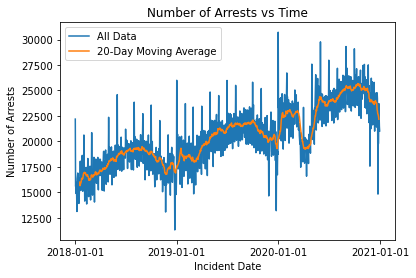

In [29]:
# Look at most popular crimes as a function of time

df_crime_data['Incident Date'] = pd.to_datetime(df_crime_data['Incident Date'], yearfirst = True)


#Let's start super simply by just viewing the number of arrests vs time
timevsArrests = df_crime_data.groupby(["Incident Date"]).count().iloc[:,0]
rollingAverage = timevsArrests.rolling(20).mean().shift(-3)
fig, ax = plt.subplots()
sns.lineplot(x = pd.to_datetime(timevsArrests.index),y=timevsArrests,ax=ax)
sns.lineplot(x = pd.to_datetime(rollingAverage.index), y = rollingAverage,ax=ax)
plt.xticks(["2018-01-01", "2019-01-01","2020-01-01","2021-01-01"])
plt.xlabel("Incident Date")
plt.ylabel("Number of Arrests")
plt.title("Number of Arrests vs Time")
plt.legend(["All Data", "20-Day Moving Average"])

In [30]:
pd.to_datetime("2018-01-01")

Timestamp('2018-01-01 00:00:00')

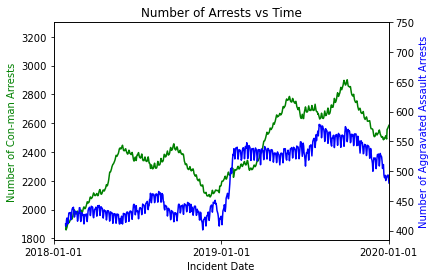

In [31]:
#There appears to be some seasonality in the data-- let's compare between a violent and nonviolent 
#crime to see if there is seasonality in both

aggAssaultOnly = df_crime_data[df_crime_data['UCR Offense Code'] == "Simple Assault"]
aggAssaultOnly = aggAssaultOnly.groupby("Incident Date").count().iloc[:,0]

consOnly = df_crime_data[df_crime_data["UCR Offense Code"] == "False Pretenses/Swindle/Confidence Game"]
consOnly = consOnly.groupby("Incident Date").count().iloc[:,0]
fig, ax = plt.subplots()
sns.lineplot(x = aggAssaultOnly.index,y=aggAssaultOnly.rolling(30).mean().shift(-3),ax=ax,color = "g")
plt.ylabel("Number of ""Con-man"" Arrests",color="g")

ax2 = plt.twinx()
sns.lineplot(x = consOnly.index, y = consOnly.rolling(30).mean().shift(-3),ax=ax2, color = "b")
plt.xticks(["2018-01-01", "2019-01-01","2020-01-01","2021-01-01"])
plt.xlabel("Incident Date")
plt.ylabel("Number of Aggravated Assault Arrests",color="b")
plt.title("Number of Arrests vs Time")
plt.xlim(pd.to_datetime("2018-01-01"), pd.to_datetime("2020-01-01"));


We need to split our database into regions. Let's call {Massachusetts, Connecticut, Rhode Island} New England and make it one region. Let's do a hot/dry region as {Arizona and New mexico}, a hot and we region which is {Louisiana, Mississippi, Alabama, Georgia, Florida}, 


Given some precipitation and temperature record, can we predict the number of a specific type of crime on a date. Also, do we need different models for the different regions? How well do they perform when compared with one another? 

Features are date, temp, location and precip. Output is # of crimes on that specific day.


Idea (priority one)
Break states into regions and one hot-encode in our linear model. 
Other things to consider-- maybe we don't need several models if we include region or location somehow as a feature. 

Idea (Second choice idea)
To get temp and precip data, we should download 5-10 years worth of data. Our goal is to have a predicted temp and precip value for each given day of the year. To do this, we could take some moving-window average of the temp on each day, and then average by day for each year. 

Idea (We sorta moved on from this)
OR we could use temperature anomoly defined as x std from the mean temp for a given date. Could do the same with precip. Don't know how much this matters? I'll bet it does. 






Temps

Option 1 is paired (crime and temp/precip) data for ~x years. 

Option 2 is just one year worth of crime data, but many years of temp data where we calculate a moving window temp for each day. And then we take the 2020 actual value and divide by the moving average, which gives some sense of anomoly. Eg a value of 2 would indicate twice the epexcted temp for that day. 





As of now, we only have one year of crime data, it can be a bit challenging to generate crime pattern based on this one-year data. I am now trying to generate a few plots based on what we have right now.

In [32]:
df_simple_assault_Texas_by_date = (
    df_crime_data[(df_crime_data['UCR Offense Code']=='Simple Assault')
                  & (df_crime_data['State Code']==42)]
    .groupby('Incident Date')
    .size()

)                                 
df_simple_assault_Texas_by_date

Incident Date
2018-01-01    200
2018-01-02    108
2018-01-03    108
2018-01-04    107
2018-01-05    135
             ... 
2020-12-27    659
2020-12-28    535
2020-12-29    513
2020-12-30    440
2020-12-31    502
Length: 1096, dtype: int64

In [33]:
df_weather_texas_by_date = (
    df_weather_years[df_weather_years['state']=='Texas']
    .groupby('Date')[['TAVG']]
    .mean()
)

df_weather_texas_by_date.index = df_weather_texas_by_date.index.astype(str)

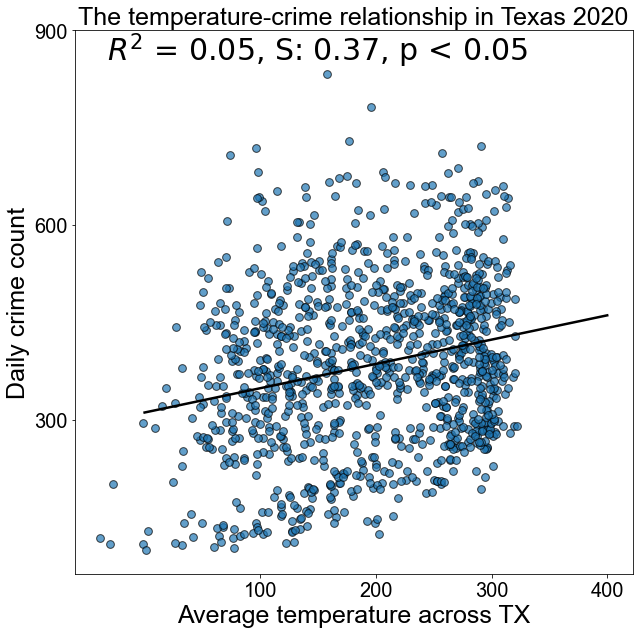

In [34]:
from sklearn.metrics import r2_score
from scipy.stats import linregress

df_weather_texas_by_date_2020 = df_weather_texas_by_date.loc[(df_weather_texas_by_date.index >= "2018-01-01") & (df_weather_texas_by_date.index <= "2020-12-32")]
fig = plt.figure(figsize=(10, 10))

plt.scatter(df_weather_texas_by_date_2020["TAVG"].tolist(), df_simple_assault_Texas_by_date.values.tolist(), s=60, alpha=0.7, edgecolors="k")

slope, intercept, r, p, se = linregress(df_weather_texas_by_date_2020["TAVG"].tolist(), df_simple_assault_Texas_by_date.values.tolist())
crime_pred = slope * df_weather_texas_by_date_2020["TAVG"] + intercept
r2 = r2_score(df_simple_assault_Texas_by_date.values.tolist(), crime_pred)
# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 400, num=100)
# Plot regression line
plt.plot(xseq, intercept + slope * xseq, color="k", lw=2.5)
plt.xticks(np.arange(100, 401, step=100), fontname = "Arial", fontsize=20)
plt.yticks(np.arange(300, 901, step=300), fontname = "Arial", fontsize=20)
plt.xlabel("Average temperature across TX", fontname = "Arial", fontsize=25)
plt.ylabel("Daily crime count", fontname = "Arial", fontsize=25)
plt.text(150, 870,
                    '${R^2}$ = ' + str(round(r2, 2)) + ", S: " + str(round(slope, 2)) + ", p < 0.05",
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=30)
plt.title("The temperature-crime relationship in Texas 2020", fontname = "Arial", fontsize=25)
plt.show()

A few caveats of the figure above:
* The tempareture unit converted? If not, the slope estimated can not be interpreted;
* It is just one year, and crimes are usually more frequent during the summer.

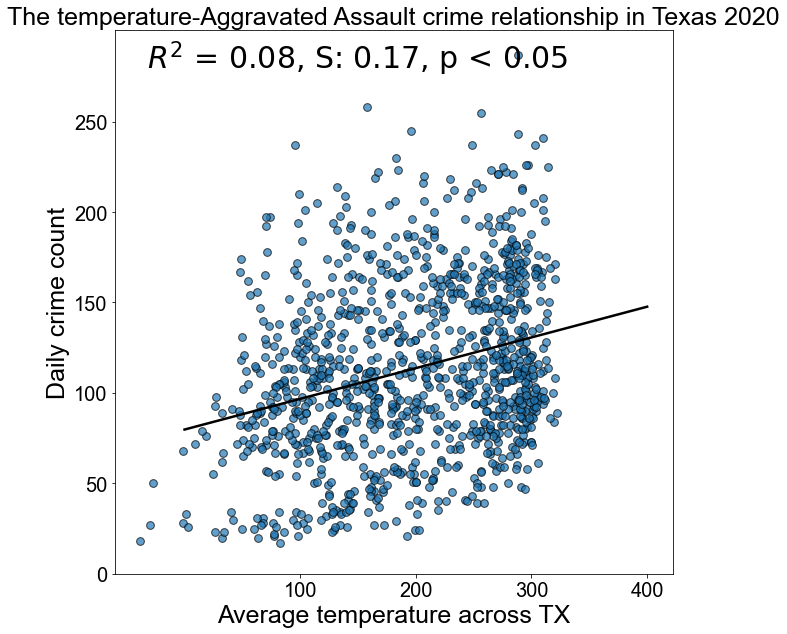

In [35]:
def plot_temperature_crime_relationship(type):
    df_Texas_by_date = (
    df_crime_data[(df_crime_data['UCR Offense Code']==type)
                  & (df_crime_data['State Code']==42)]
        .groupby('Incident Date')
        .size()
        )
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(df_weather_texas_by_date_2020["TAVG"].tolist(), df_Texas_by_date.values.tolist(), s=60, alpha=0.7, edgecolors="k")

    slope, intercept, r, p, se = linregress(df_weather_texas_by_date_2020["TAVG"].tolist(), df_Texas_by_date.values.tolist())
    crime_pred = slope * df_weather_texas_by_date_2020["TAVG"] + intercept
    r2 = r2_score(df_Texas_by_date.values.tolist(), crime_pred)
    # Create sequence of 100 numbers from 0 to 100 
    xseq = np.linspace(0, 400, num=100)
    # Plot regression line
    plt.plot(xseq, intercept + slope * xseq, color="k", lw=2.5)
    local_max = int(np.max(df_Texas_by_date.values.tolist()) / 50) * 50 + 50
    local_min = int(np.min(df_Texas_by_date.values.tolist()) / 50) * 50
    plt.xticks(np.arange(100, 401, step=100), fontname = "Arial", fontsize=20)
    plt.yticks(np.arange(local_min, local_max, step=50), fontname = "Arial", fontsize=20)
    plt.xlabel("Average temperature across TX", fontname = "Arial", fontsize=25)
    plt.ylabel("Daily crime count", fontname = "Arial", fontsize=25)
    p_str = ", p < 0.05" if p < 0.05 else ", p: " + str(round(p, 2))
    plt.text(150, local_max * 0.95,
                        '${R^2}$ = ' + str(round(r2, 2)) + ", S: " + str(round(slope, 2)) + p_str,
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=30)
    plt.title("The temperature-" + type + " crime relationship in Texas 2020", fontname = "Arial", fontsize=25)
    plt.show()
    return


plot_temperature_crime_relationship("Aggravated Assault")

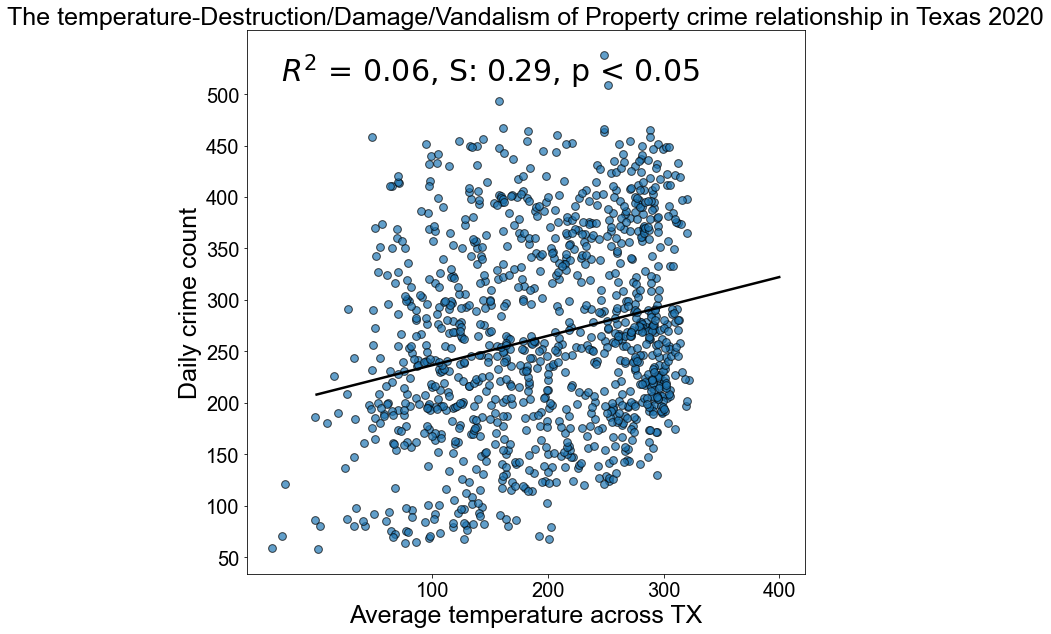

In [36]:
plot_temperature_crime_relationship("Destruction/Damage/Vandalism of Property")


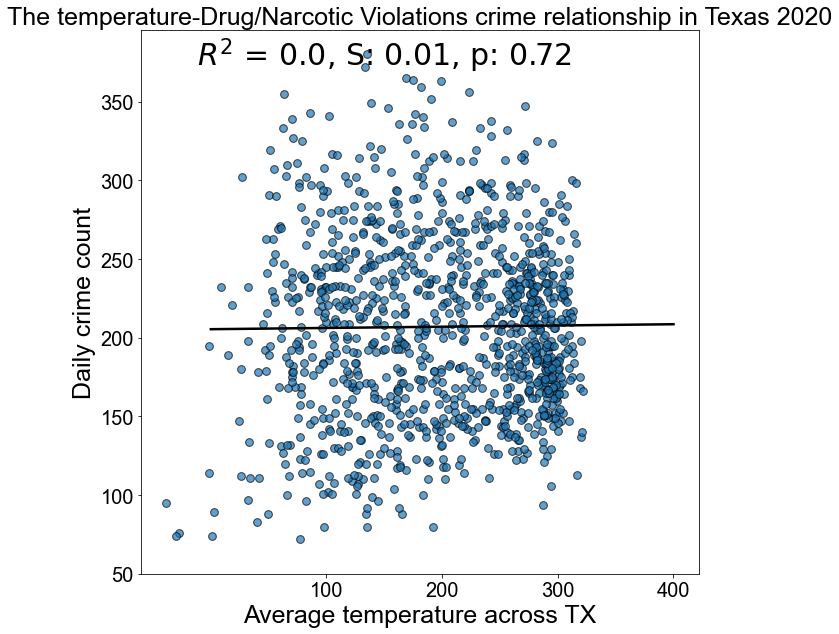

In [37]:
plot_temperature_crime_relationship("Drug/Narcotic Violations")


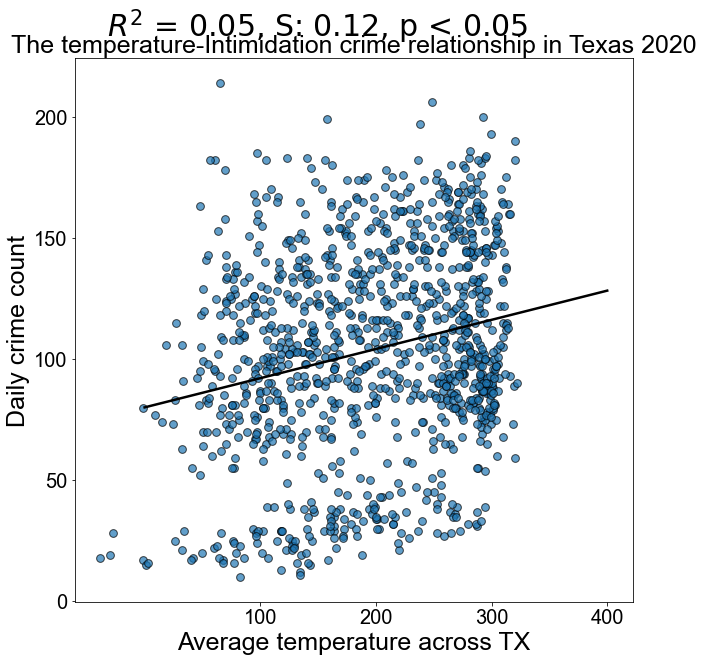

In [38]:
plot_temperature_crime_relationship("Intimidation")


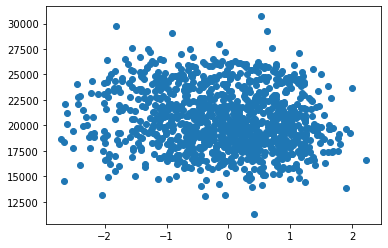

In [39]:
# df_weather_by_date = df_states_weather_years.groupby('Date').mean()
df_weather_texas_valid = (
    df_weather_texas[(df_weather_texas['Date'].astype(str) >= "2018-01-01")
    & (df_weather_texas['Date'].astype(str) <= "2020-12-32")]

)

crime_count = df_crime_data[['Incident Date', 'UCR Offense Code']].groupby('Incident Date').count().iloc[:, 0]

df_weather_texas_valid

plt.scatter(df_weather_texas_valid['Z-Score'], crime_count)

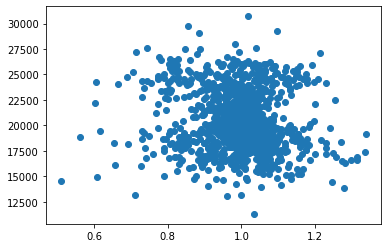

In [40]:
plt.scatter(df_weather_texas_valid['Temp Ratio'], crime_count)

In [193]:
# df_weather_by_date = df_states_weather_years.groupby('Date').mean()
df_states_weather_years_valid = (
    df_states_weather_years[(df_states_weather_years['Date'].astype(str) >= "2018-01-01")
    & (df_states_weather_years['Date'].astype(str) <= "2020-12-32")]

)

df_combined = df_states_weather_years_valid.groupby('Date').mean()

crime_count = df_crime_data[['Incident Date', 'UCR Offense Code']].groupby('Incident Date').count().iloc[:, 0]
# df_crime_and_weather 
# df_combined = (
#     df_combined
#     .merge(right=crime_count, how='inner', left_on='Date', right_on='Incident Date')
# )

df_combined['Number of Arrests'] = crime_count

In [194]:
df_combined

,TAVG,PRCP,TAVG Fahrenheit,Latitude,Longitude,Elevation,Day of Year,Number of Arrests
Date,,,,,,,,
2018-01-01,-94.627799,2.458049,14.966996,39.741907,-94.113985,662.083023,1.0,22191
2018-01-02,-84.161101,4.886727,16.851002,39.743808,-94.107875,662.181211,2.0,15593
2018-01-03,-48.851433,7.294490,23.206742,39.741760,-94.109363,662.277135,3.0,15679
2018-01-04,-45.288121,40.193071,23.848138,39.741411,-94.109205,662.293622,4.0,14894
2018-01-05,-53.816997,7.798497,22.312941,39.738998,-94.107293,662.073245,5.0,15969
...,...,...,...,...,...,...,...,...
2020-12-27,4.797579,5.342429,32.863564,39.750167,-94.127212,683.302062,362.0,19832
2020-12-28,15.218654,10.191935,34.739358,39.741932,-94.139490,683.225707,363.0,23714
2020-12-29,2.298205,24.869546,32.413677,39.753299,-94.111898,681.361381,364.0,22442


<AxesSubplot:xlabel='TAVG Fahrenheit', ylabel='Number of Arrests'>

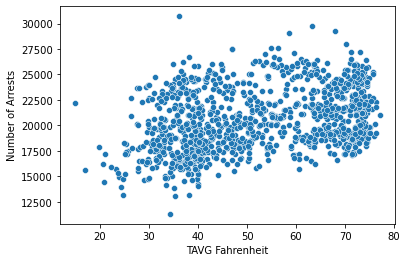

In [195]:
sns.scatterplot(data=df_combined, x='TAVG Fahrenheit', y='Number of Arrests')

<AxesSubplot:xlabel='Day of Year', ylabel='Number of Arrests'>

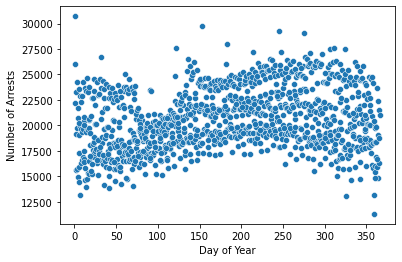

In [196]:
sns.scatterplot(data=df_combined, x='Day of Year', y='Number of Arrests')

# Data Modeling and Inferences

Our machine learning problem is to investigate, given features related to weather and/or day of the year, if we can predict the number of crimes. That is, we will be investigating if features such as temperature, precipitation, day of the week, day of the year, and/or location can help predict the number of crimes on a given day.

We plan on using ordinary least squares for our model. As seen in Exploratory Data Analysis Section, there is correlation between the temperature and the number of crimes. After a baseline model, we can add features to improve our prediction accuracy.

In [197]:
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split

In [198]:
train_val, test = train_test_split(df_combined, test_size = 0.1, random_state = 42)

train, val = train_test_split(train_val, test_size = 0.25, random_state = 42)

print('Training set size: {}'.format(train.size))
print('Validation set size: {}'.format(val.size))
print('Test set size: {}'.format(test.size))

train

Training set size: 5912
Validation set size: 1976
Test set size: 880


,TAVG,PRCP,TAVG Fahrenheit,Latitude,Longitude,Elevation,Day of Year,Number of Arrests
Date,,,,,,,,
2019-07-14,237.829726,21.721364,74.809351,39.658615,-94.223676,660.331333,195.0,19822
2019-08-19,234.782827,17.380920,74.260909,39.732157,-93.753248,649.917691,231.0,22253
2020-06-10,200.745839,33.357830,68.134251,39.749528,-93.767080,667.699640,162.0,24078
2020-04-10,75.612600,9.624049,45.610268,39.750110,-93.772940,669.234735,101.0,20243
2019-07-25,214.748108,9.461997,70.654659,39.737030,-93.764136,649.210327,206.0,21850
...,...,...,...,...,...,...,...,...
2019-12-15,13.632076,10.258453,34.453774,39.732092,-93.773968,651.364232,349.0,18660
2020-12-06,26.680802,9.040725,36.802544,39.747491,-94.130802,683.580885,341.0,21622
2019-01-28,-6.571959,11.328704,30.817047,39.730613,-94.136647,662.642347,28.0,18551


In [199]:
# Copied from Project 1B
def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values
    Input:
      predicted (1D array): vector of predicted/fitted values
      actual (1D array): vector of actual values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((actual - predicted)**2))

In [200]:
X_train = train['TAVG Fahrenheit'].to_numpy().reshape(-1, 1)
X_val = val['TAVG Fahrenheit'].to_numpy().reshape(-1, 1)
y_train = train['Number of Arrests'].to_numpy().reshape(-1, 1)
y_val = val['Number of Arrests'].to_numpy().reshape(-1, 1)


In [201]:
linear_model = lm.LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Number of Arrests')

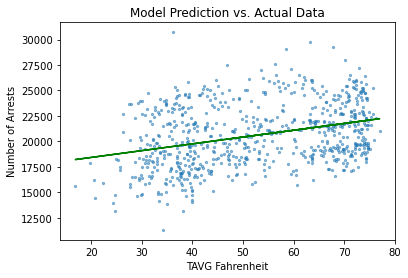

In [216]:
y_predicted = linear_model.predict(X_train)

plt.scatter(X_train, y_train, alpha = 0.5, s=5)
plt.plot(X_train, y_predicted, color='g')
plt.title('Model Prediction vs. Actual Data')
plt.xlabel('TAVG Fahrenheit')
plt.ylabel('Number of Arrests')

Text(0.5, 0, 'Actual Number of Crimes')

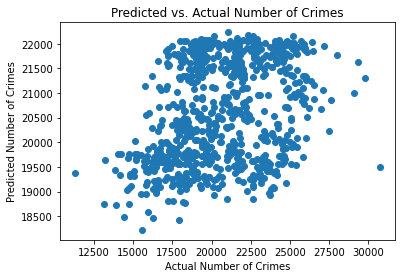

In [212]:
plt.scatter(y_train, y_predicted)
plt.title('Predicted vs. Actual Number of Crimes')
plt.ylabel('Predicted Number of Crimes')
plt.xlabel('Actual Number of Crimes')

In [213]:
print('RMSE: ', rmse(linear_model.predict(X_train), y_train))
print('Score: ', linear_model.score(y_train, y_predicted))

RMSE:  2866.1884805733894
Score:  -1825058.1069072192


Text(0, 0.5, 'Residuals, True y - Predicted y')

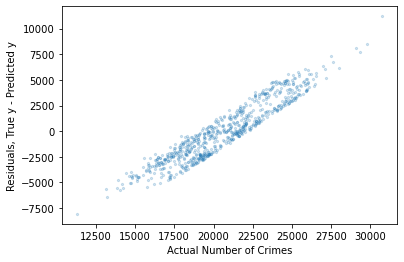

In [214]:
residuals = y_train - y_predicted
plt.scatter(y_train, residuals, alpha = 0.2, s=5)
plt.xlabel('Actual Number of Crimes')
plt.ylabel('Residuals, True y - Predicted y')

#### Where I (Gavin) stopped:
It appears that absolute temperature is a better metric than Z-score (even with a smoothed average curve), which is interesting.

I tried doing modeling just using absolute temperature, but am running into issues with my residual plot (I don't know why it has such a positive slope).